<a href="https://colab.research.google.com/github/stephe-hu/datasci_3_eda/blob/main/hha507assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load in data

In [34]:
# Load in data
df = pd.read_csv("https://raw.githubusercontent.com/stephe-hu/datasci_3_eda/main/data/OMT_MDCD_R23_P11_V10_YTD21_GEO.csv")
df

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2021,National,NaN,National,All,21654225.0,686625295.0,3.15,-2.23,-0.09,4672903.0,21.58,14.04,2.64
1,2021,National,NaN,National,FFS,5084859.0,180712324.0,2.81,-2.48,-0.15,736567.0,14.49,5.34,1.05
2,2021,National,NaN,National,MC,16569366.0,505912971.0,3.28,-2.14,-0.06,3936336.0,23.76,16.90,2.98
3,2021,State,1.0,Alabama,All,175237.0,7525456.0,2.33,-3.04,-0.38,7767.0,4.43,-0.36,-0.18
4,2021,State,1.0,Alabama,FFS,175237.0,7525456.0,2.33,-3.04,-0.38,7767.0,4.43,-0.36,-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2013,State,55.0,Wisconsin,FFS,896650.0,10127535.0,8.85,NaN,NaN,119908.0,13.37,NaN,NaN
1400,2013,State,55.0,Wisconsin,MC,2350.0,28041.0,8.38,NaN,NaN,434.0,18.47,NaN,NaN
1401,2013,State,56.0,Wyoming,All,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN
1402,2013,State,56.0,Wyoming,FFS,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN


In [35]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [36]:
# Look for missingness
df.isnull().sum()

year                                0
geo_lvl                             0
geo_cd                             27
geo_desc                            0
plan_type                           0
tot_opioid_clms                    18
tot_clms                            2
opioid_prscrbng_rate              132
opioid_prscrbng_rate_5y_chg       852
opioid_prscrbng_rate_1y_chg       285
la_tot_opioid_clms                 36
la_opioid_prscrbng_rate           156
la_opioid_prscrbng_rate_5y_chg    872
la_opioid_prscrbng_rate_1y_chg    311
dtype: int64

In [39]:
# Convert variables
convert_columns = ['year', 'geo_cd']
df[convert_columns] = df[convert_columns].astype(str)

In [37]:
df.to_csv('clean.csv')

# Univariate Analysis

## For Opioid Prescribing Rate

In [46]:
# Calculate measures of central tendency
mean = df['opioid_prscrbng_rate'].mean()
median = df['opioid_prscrbng_rate'].median()
mode = df['opioid_prscrbng_rate'].mode().values[0]
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 5.01433962264151
Median: 4.64
Mode: 2.87


In [44]:
# Calculate measures of spread
range = df['opioid_prscrbng_rate'].max() - df['opioid_prscrbng_rate'].min()
variance = df['opioid_prscrbng_rate'].var()
std_deviation = df['opioid_prscrbng_rate'].std()
iqr = df['opioid_prscrbng_rate'].quantile(0.75) - df['opioid_prscrbng_rate'].quantile(0.25)
print(f'Range: {range}')
print(f'Variance: {variance}')
print(f'Standard deviation: {std_deviation}')
print(f'IQR: {iqr}')

Range: 29.44
Variance: 7.750466912103083
Standard deviation: 2.7839660400412725
IQR: 3.33


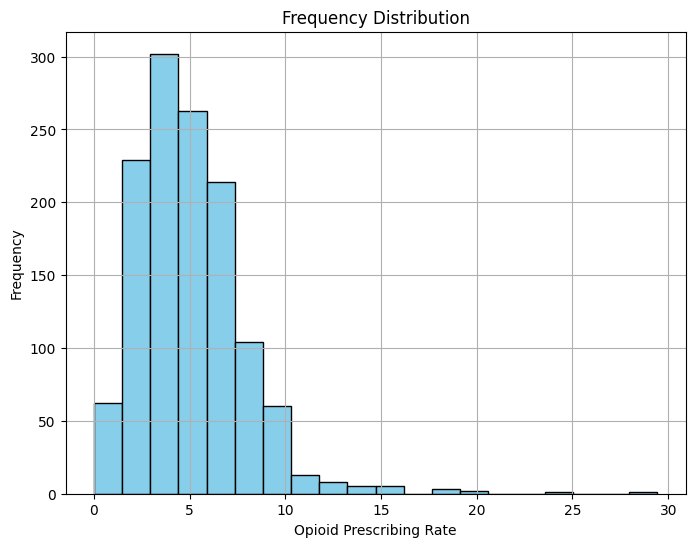

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(df['opioid_prscrbng_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## For Long-Acting Opioid Prescribing Rate


In [49]:
# Calculate measures of central tendency
mean = df['la_opioid_prscrbng_rate'].mean()
median = df['la_opioid_prscrbng_rate'].median()
mode = df['la_opioid_prscrbng_rate'].mode().values[0]
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 10.049791666666666
Median: 8.25
Mode: 0.0


In [50]:
# Calculate measures of spread
range = df['la_opioid_prscrbng_rate'].max() - df['la_opioid_prscrbng_rate'].min()
variance = df['la_opioid_prscrbng_rate'].var()
std_deviation = df['la_opioid_prscrbng_rate'].std()
iqr = df['la_opioid_prscrbng_rate'].quantile(0.75) - df['la_opioid_prscrbng_rate'].quantile(0.25)
print(f'Variance: {variance}')
print(f'Standard deviation: {std_deviation}')
print(f'IQR: {iqr}')

Variance: 119.56781695736434
Standard deviation: 10.934706990009579
IQR: 4.7575


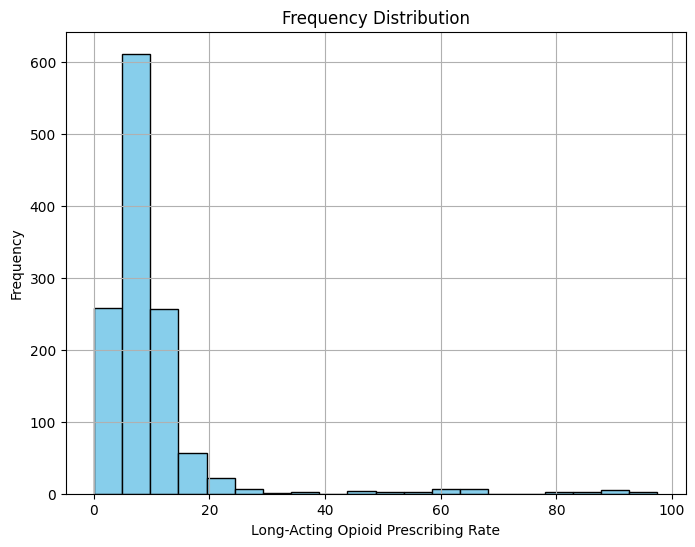

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(df['la_opioid_prscrbng_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Long-Acting Opioid Prescribing Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bivariate Analysis

# Handling Outliers

In [40]:
df.describe()

,tot_opioid_clms,tot_clms,opioid_prscrbng_rate,opioid_prscrbng_rate_5y_chg,opioid_prscrbng_rate_1y_chg,la_tot_opioid_clms,la_opioid_prscrbng_rate,la_opioid_prscrbng_rate_5y_chg,la_opioid_prscrbng_rate_1y_chg
count,1.386000e+03,1.402000e+03,1272.000000,552.000000,1119.000000,1.368000e+03,1248.000000,532.000000,1093.000000
mean,7.708348e+05,1.659230e+07,5.014340,-2.829149,-0.447417,8.065654e+04,10.049792,3.045940,0.559707
std,3.049434e+06,6.494329e+07,2.783966,2.421316,1.038795,3.474960e+05,10.934707,14.251594,5.139024
min,0.000000e+00,0.000000e+00,0.000000,-10.420000,-4.100000,0.000000e+00,0.000000,-14.260000,-12.330000
25%,4.196125e+04,1.096489e+06,3.090000,-3.910000,-0.820000,3.646000e+03,5.597500,-1.500000,-0.570000
50%,1.820830e+05,4.402720e+06,4.640000,-3.065000,-0.480000,1.445900e+04,8.250000,-0.220000,-0.060000
75%,5.702172e+05,1.137824e+07,6.420000,-2.237500,-0.180000,4.653800e+04,10.355000,1.225000,0.460000
max,3.796407e+07,7.042968e+08,29.440000,16.190000,15.310000,4.672903e+06,97.470000,84.250000,92.650000
